In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [3]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                else:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    print(f'Memory usage decreased to {end_mem:.2f} MB ({100*(start_mem - end_mem)/start_mem:.1f}% reduction)')
    return df

In [7]:
# Thêm ../ vào trước đường dẫn
train_transaction = pd.read_csv(r'../data/IEEE-CIS/train_transaction.csv')
train_identity = pd.read_csv(r'../data/IEEE-CIS/train_identity.csv')

In [5]:
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
train = reduce_mem_usage(train)

# Giải phóng bộ nhớ tạm
del train_transaction, train_identity
gc.collect()

print(f"Kích thước tập dữ liệu: {train.shape}")

Memory usage decreased to 645.97 MB (67.0% reduction)
Kích thước tập dữ liệu: (590540, 434)


First look at the dataset

In [8]:
print("5 dòng đầu tiên của train_transaction:")
train_transaction.head()

5 dòng đầu tiên của train_transaction:


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
print("5 dòng cuối cùng của train_transaction:")
train_transaction.tail()

5 dòng cuối cùng của train_transaction:


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590539,3577539,0,15811131,279.95,W,15066,170.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print(f'Train_transaction có {train_transaction.shape[0]} dòng và {train_transaction.shape[1]} cột.')

Train_transaction có 590540 dòng và 394 cột.


In [11]:
print('Mô tả train_transaction:')
train_transaction.describe()

Mô tả train_transaction:


,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


In [12]:
print(f"Tỉ lệ số cột có giá trị thiếu trong train_transaction: {train_transaction.isnull().sum().sum() / (train_transaction.shape[0] * train_transaction.shape[1]) * 100:.2f}%")

Tỉ lệ số cột có giá trị thiếu trong train_transaction: 41.07%


Biểu đồ thể hiện phân bố của biến mục tiêu 'isFraud':


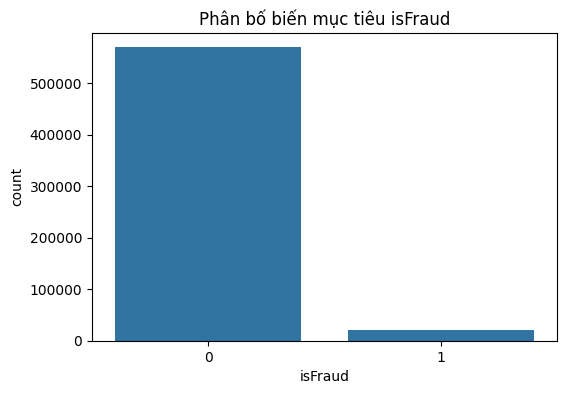

Tỉ lệ isFraud = 1: 3.50%


In [13]:
print("Biểu đồ thể hiện phân bố của biến mục tiêu 'isFraud':")
plt.figure(figsize=(6,4))
sns.countplot(x='isFraud', data=train_transaction)
plt.title('Phân bố biến mục tiêu isFraud')
plt.show()

print(f'Tỉ lệ isFraud = 1: {train_transaction["isFraud"].mean() * 100:.2f}%')

In [28]:
print('5 dong đầu tiên của train_identity:')
train_identity.head()

5 dong đầu tiên của train_identity:


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [14]:
print('5 dòng cuối cùng của train_identity:')
train_identity.tail()

5 dòng cuối cùng của train_identity:


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,...,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,NaN,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN,0.0,...,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS
144232,3577534,-45.0,339406.0,NaN,NaN,-10.0,-100.0,NaN,NaN,NaN,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,RNE-L03 Build/HUAWEIRNE-L03


In [15]:
print("Top 10 cột có giá trị thiếu nhiều nhất trong train_transaction và % tương ứng:")
missing_values = train_transaction.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / train_transaction.shape[0]) * 100
print(pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing Values', 'Percentage']).head(10))

Top 10 cột có giá trị thiếu nhiều nhất trong train_transaction và % tương ứng:
       Missing Values  Percentage
dist2          552913   93.628374
D7             551623   93.409930
D13            528588   89.509263
D14            528353   89.469469
D12            525823   89.041047
D6             517353   87.606767
D9             515614   87.312290
D8             515614   87.312290
V153           508595   86.123717
V149           508595   86.123717


In [34]:
print("Các cột số (numerical columns) trong train_transaction:")
numerical_columns = train_transaction.select_dtypes(include=['number']).columns
print(numerical_columns)

print("Các cột phân loại (categorical columns) trong train_transaction:")
categorical_columns = train_transaction.select_dtypes(include=['object']).columns
print(categorical_columns)

Các cột số (numerical columns) trong train_transaction:
Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1',
       'card2', 'card3', 'card5', 'addr1', 'addr2',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=380)
Các cột phân loại (categorical columns) trong train_transaction:
Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'],
      dtype='object')


Definition: ProductCD is product code that the product for each transaction. In the data description post, they state that ProductCD is a service and not a physical product.

Categories & Labels: C, W, R, H, S

In [35]:
train_transaction.ProductCD.value_counts()

ProductCD
W    439670
C     68519
R     37699
H     33024
S     11628
Name: count, dtype: int64

Biểu đồ Countplot của cột ProductCD:


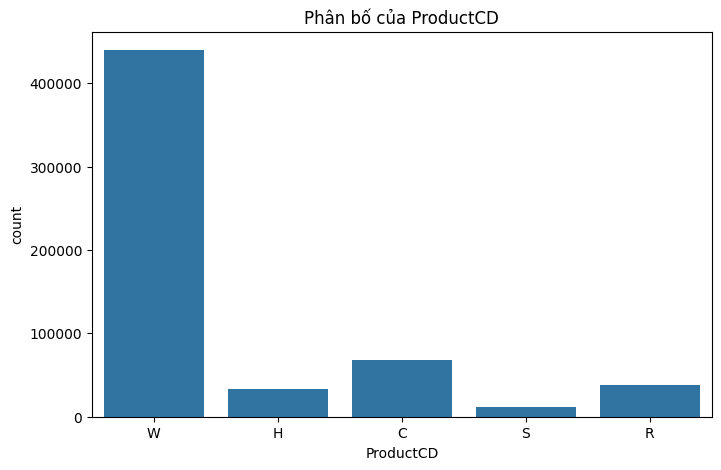

In [36]:
print("Biểu đồ Countplot của cột ProductCD:")
plt.figure(figsize=(8,5))
sns.countplot(x='ProductCD', data=train_transaction)
plt.title('Phân bố của ProductCD')
plt.show()

Card1-Card6:

Definition: card1 - card6: Payment card information, such as card type, card category, issue bank, country, etc.

Definition of Card4: Card4 shows card distributer types.

Categories & Labels: Visa, Mastercard, American express, Discover

Definition of Card6: Card6 shows card types.

Categories & Labels: Debit, Credit, Debit or Credit , Charge card

Phân tích card4 và card6: 

Phân bố của card4:
card4
visa                384767
mastercard          189217
american express      8328
discover              6651
NaN                   1577
Name: count, dtype: int64


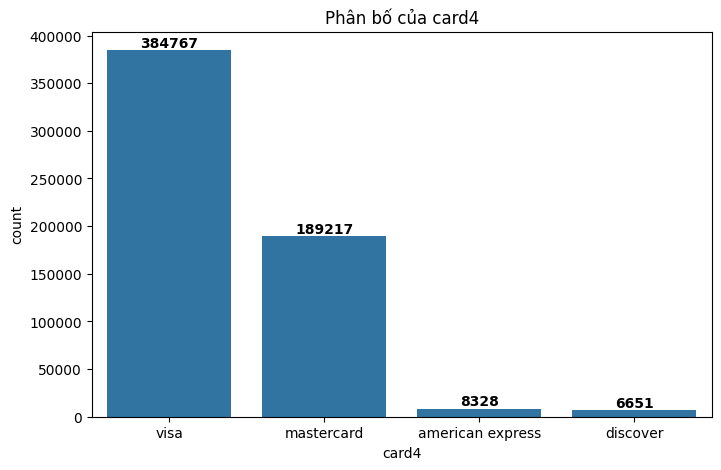


Phân bố của card6:
card6
debit              439938
credit             148986
NaN                  1571
debit or credit        30
charge card            15
Name: count, dtype: int64


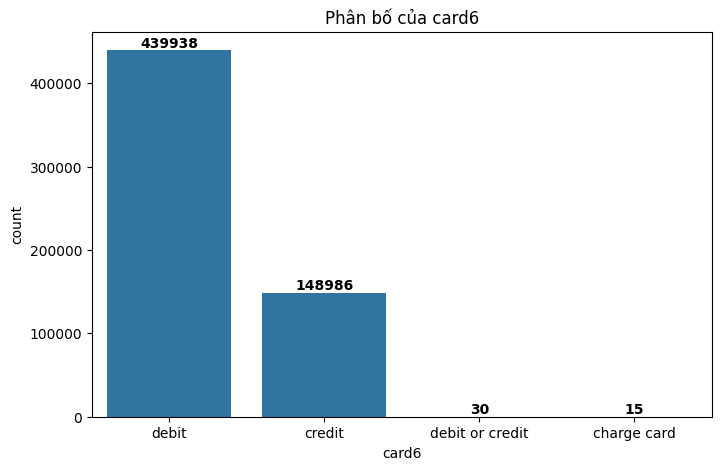

In [39]:
print("Phân tích card4 và card6: ")
for card in ['card4', 'card6']:
    print(f"\nPhân bố của {card}:")
    print(train_transaction[card].value_counts(dropna=False).head(10))
    plt.figure(figsize=(8,5))
    ax = sns.countplot(x=card, data=train_transaction, order=train_transaction[card].value_counts().index[:10])
    plt.title(f'Phân bố của {card}')
    
    # Thêm số lên trên mỗi cột
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=10, fontweight='bold')
    
    plt.show()

## 2. Phân tích Transaction Amount (Số tiền giao dịch)

Phân bố TransactionAmt:
Min: 0.25
Max: 31937.39
Mean: 135.03
Median: 68.77
Std: 239.16


C:\Users\Admin\AppData\Local\Temp\ipykernel_22912\2709464183.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([np.log1p(fraud_0), np.log1p(fraud_1)], labels=["Non-Fraud", "Fraud"])


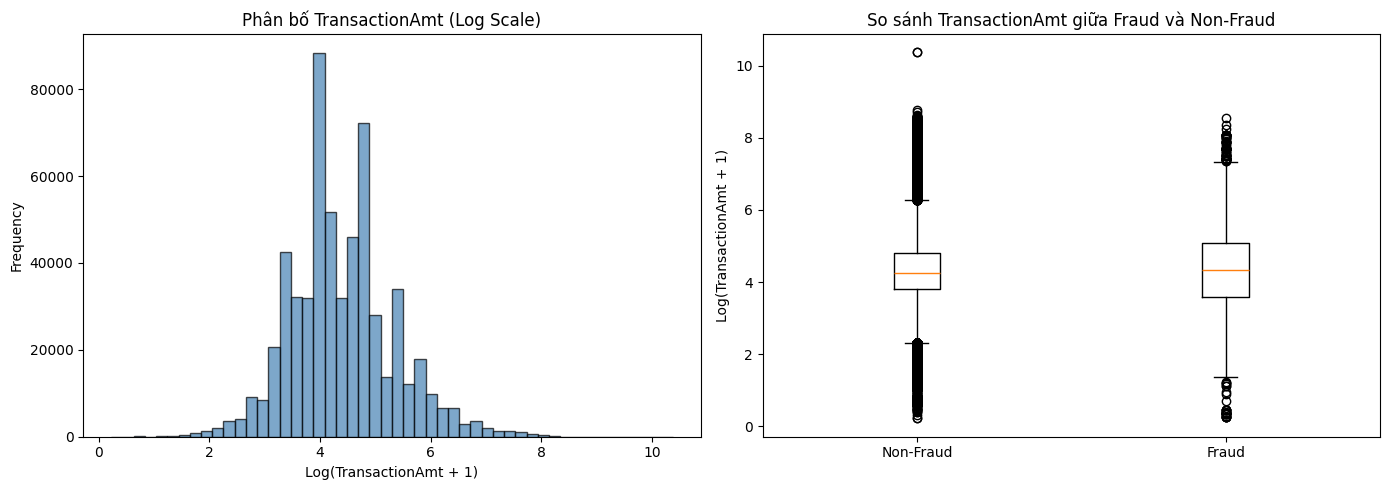

In [16]:
print("Phân bố TransactionAmt:")
print(f"Min: {train_transaction['TransactionAmt'].min():.2f}")
print(f"Max: {train_transaction['TransactionAmt'].max():.2f}")
print(f"Mean: {train_transaction['TransactionAmt'].mean():.2f}")
print(f"Median: {train_transaction['TransactionAmt'].median():.2f}")
print(f"Std: {train_transaction['TransactionAmt'].std():.2f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution of TransactionAmt (log scale)
axes[0].hist(np.log1p(train_transaction["TransactionAmt"]), bins=50, edgecolor="black", alpha=0.7, color="steelblue")
axes[0].set_xlabel("Log(TransactionAmt + 1)")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Phân bố TransactionAmt (Log Scale)")

# Boxplot by Fraud
fraud_0 = train_transaction[train_transaction["isFraud"] == 0]["TransactionAmt"]
fraud_1 = train_transaction[train_transaction["isFraud"] == 1]["TransactionAmt"]
axes[1].boxplot([np.log1p(fraud_0), np.log1p(fraud_1)], labels=["Non-Fraud", "Fraud"])
axes[1].set_ylabel("Log(TransactionAmt + 1)")
axes[1].set_title("So sánh TransactionAmt giữa Fraud và Non-Fraud")

plt.tight_layout()
plt.show()

## 3. Phân tích theo thời gian (TransactionDT)

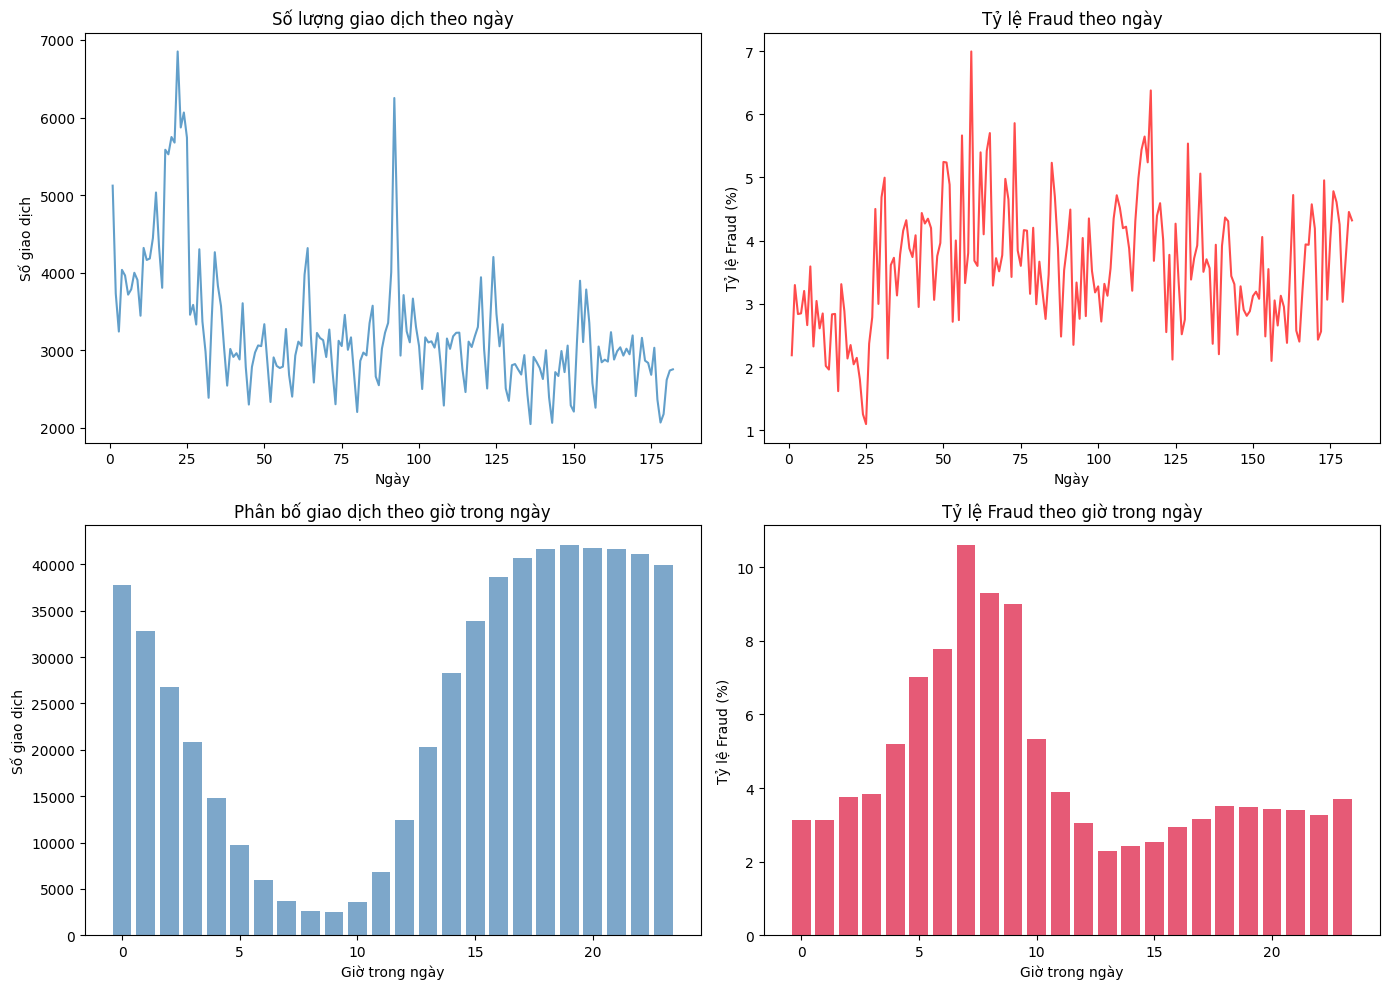

In [17]:
# TransactionDT là số giây từ một thời điểm tham chiếu
# Chuyển đổi sang ngày và giờ
train_transaction["TransactionDT_days"] = train_transaction["TransactionDT"] // (24 * 60 * 60)
train_transaction["TransactionDT_hours"] = (train_transaction["TransactionDT"] // (60 * 60)) % 24

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Số giao dịch theo ngày
transactions_per_day = train_transaction.groupby("TransactionDT_days").size()
axes[0, 0].plot(transactions_per_day.index, transactions_per_day.values, alpha=0.7)
axes[0, 0].set_xlabel("Ngày")
axes[0, 0].set_ylabel("Số giao dịch")
axes[0, 0].set_title("Số lượng giao dịch theo ngày")

# 2. Tỷ lệ fraud theo ngày
fraud_rate_by_day = train_transaction.groupby("TransactionDT_days")["isFraud"].mean()
axes[0, 1].plot(fraud_rate_by_day.index, fraud_rate_by_day.values * 100, alpha=0.7, color="red")
axes[0, 1].set_xlabel("Ngày")
axes[0, 1].set_ylabel("Tỷ lệ Fraud (%)")
axes[0, 1].set_title("Tỷ lệ Fraud theo ngày")

# 3. Phân bố giao dịch theo giờ
transactions_per_hour = train_transaction.groupby("TransactionDT_hours").size()
axes[1, 0].bar(transactions_per_hour.index, transactions_per_hour.values, alpha=0.7, color="steelblue")
axes[1, 0].set_xlabel("Giờ trong ngày")
axes[1, 0].set_ylabel("Số giao dịch")
axes[1, 0].set_title("Phân bố giao dịch theo giờ trong ngày")

# 4. Tỷ lệ fraud theo giờ
fraud_rate_by_hour = train_transaction.groupby("TransactionDT_hours")["isFraud"].mean()
axes[1, 1].bar(fraud_rate_by_hour.index, fraud_rate_by_hour.values * 100, alpha=0.7, color="crimson")
axes[1, 1].set_xlabel("Giờ trong ngày")
axes[1, 1].set_ylabel("Tỷ lệ Fraud (%)")
axes[1, 1].set_title("Tỷ lệ Fraud theo giờ trong ngày")

plt.tight_layout()
plt.show()

## 4. Tỷ lệ Fraud theo các biến Categorical

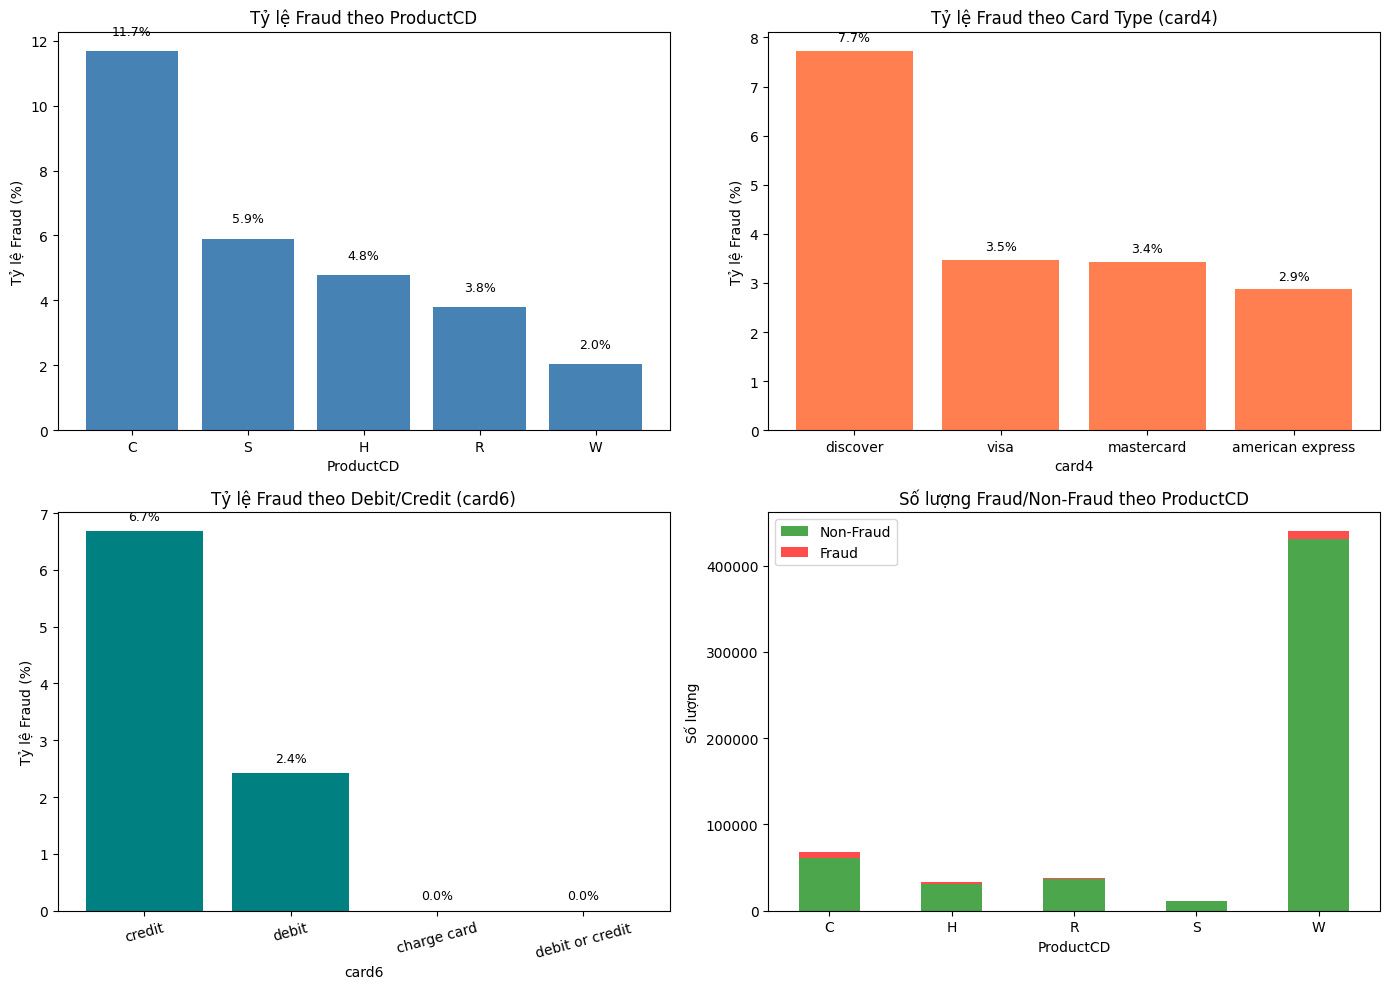

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Fraud rate by ProductCD
fraud_rate_product = train_transaction.groupby("ProductCD")["isFraud"].mean().sort_values(ascending=False)
axes[0, 0].bar(fraud_rate_product.index, fraud_rate_product.values * 100, color="steelblue")
axes[0, 0].set_xlabel("ProductCD")
axes[0, 0].set_ylabel("Tỷ lệ Fraud (%)")
axes[0, 0].set_title("Tỷ lệ Fraud theo ProductCD")
for i, v in enumerate(fraud_rate_product.values):
    axes[0, 0].text(i, v * 100 + 0.5, f"{v*100:.1f}%", ha="center", fontsize=9)

# 2. Fraud rate by card4
fraud_rate_card4 = train_transaction.groupby("card4")["isFraud"].mean().sort_values(ascending=False)
axes[0, 1].bar(fraud_rate_card4.index, fraud_rate_card4.values * 100, color="coral")
axes[0, 1].set_xlabel("card4")
axes[0, 1].set_ylabel("Tỷ lệ Fraud (%)")
axes[0, 1].set_title("Tỷ lệ Fraud theo Card Type (card4)")
for i, v in enumerate(fraud_rate_card4.values):
    axes[0, 1].text(i, v * 100 + 0.2, f"{v*100:.1f}%", ha="center", fontsize=9)

# 3. Fraud rate by card6
fraud_rate_card6 = train_transaction.groupby("card6")["isFraud"].mean().sort_values(ascending=False)
axes[1, 0].bar(fraud_rate_card6.index, fraud_rate_card6.values * 100, color="teal")
axes[1, 0].set_xlabel("card6")
axes[1, 0].set_ylabel("Tỷ lệ Fraud (%)")
axes[1, 0].set_title("Tỷ lệ Fraud theo Debit/Credit (card6)")
axes[1, 0].tick_params(axis="x", rotation=15)
for i, v in enumerate(fraud_rate_card6.values):
    axes[1, 0].text(i, v * 100 + 0.2, f"{v*100:.1f}%", ha="center", fontsize=9)

# 4. Fraud count by ProductCD (stacked)
fraud_counts = train_transaction.groupby(["ProductCD", "isFraud"]).size().unstack(fill_value=0)
fraud_counts.plot(kind="bar", stacked=True, ax=axes[1, 1], color=["green", "red"], alpha=0.7)
axes[1, 1].set_xlabel("ProductCD")
axes[1, 1].set_ylabel("Số lượng")
axes[1, 1].set_title("Số lượng Fraud/Non-Fraud theo ProductCD")
axes[1, 1].legend(["Non-Fraud", "Fraud"])
axes[1, 1].tick_params(axis="x", rotation=0)

plt.tight_layout()
plt.show()

## 5. Phân tích Email Domain

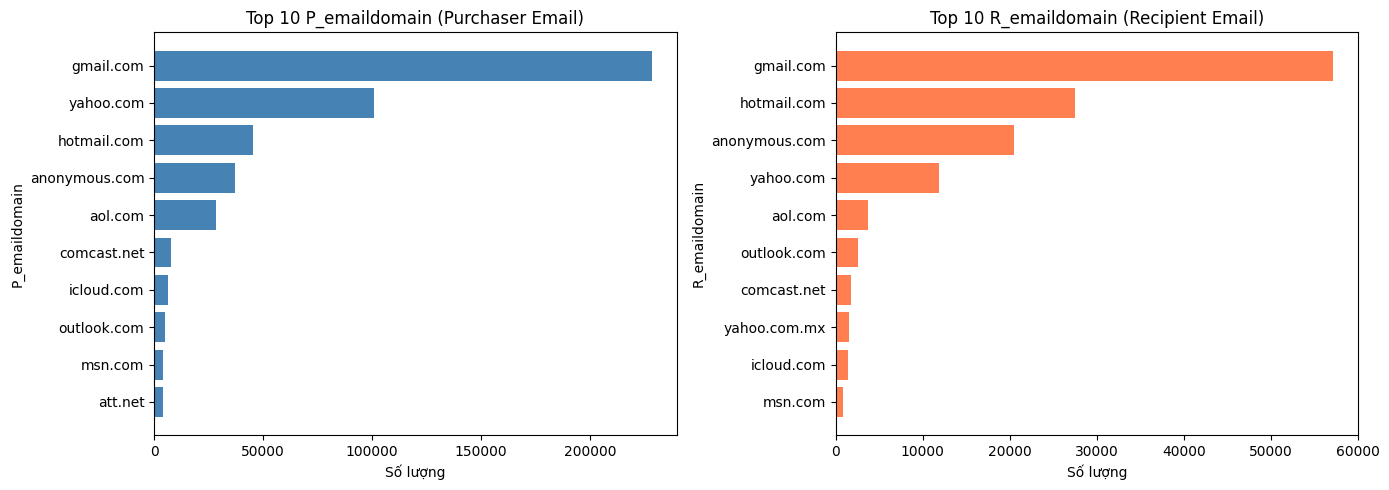

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Top P_emaildomain
top_p_email = train_transaction["P_emaildomain"].value_counts().head(10)
axes[0].barh(top_p_email.index[::-1], top_p_email.values[::-1], color="steelblue")
axes[0].set_xlabel("Số lượng")
axes[0].set_ylabel("P_emaildomain")
axes[0].set_title("Top 10 P_emaildomain (Purchaser Email)")

# Top R_emaildomain
top_r_email = train_transaction["R_emaildomain"].value_counts().head(10)
axes[1].barh(top_r_email.index[::-1], top_r_email.values[::-1], color="coral")
axes[1].set_xlabel("Số lượng")
axes[1].set_ylabel("R_emaildomain")
axes[1].set_title("Top 10 R_emaildomain (Recipient Email)")

plt.tight_layout()
plt.show()

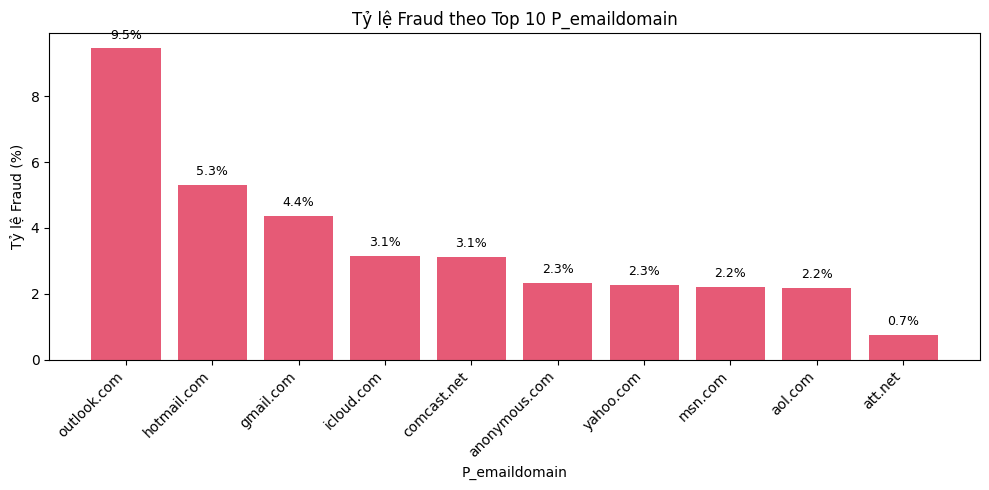

In [20]:
# Tỷ lệ fraud theo top email domains
top_p_emails = train_transaction["P_emaildomain"].value_counts().head(10).index
fraud_rate_p_email = train_transaction[train_transaction["P_emaildomain"].isin(top_p_emails)].groupby("P_emaildomain")["isFraud"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(fraud_rate_p_email.index, fraud_rate_p_email.values * 100, color="crimson", alpha=0.7)
plt.xlabel("P_emaildomain")
plt.ylabel("Tỷ lệ Fraud (%)")
plt.title("Tỷ lệ Fraud theo Top 10 P_emaildomain")
plt.xticks(rotation=45, ha="right")
for i, v in enumerate(fraud_rate_p_email.values):
    plt.text(i, v * 100 + 0.3, f"{v*100:.1f}%", ha="center", fontsize=9)
plt.tight_layout()
plt.show()

## 6. Visualization Missing Values

In [ ]:
# Tính tỷ lệ missing cho từng cột
missing_pct = (train_transaction.isnull().sum() / len(train_transaction) * 100).sort_values(ascending=False)
missing_pct = missing_pct[missing_pct > 0]  # Chỉ lấy cột có missing

print(f"Số cột có giá trị missing: {len(missing_pct)}")
print(f"Số cột không có missing: {len(train_transaction.columns) - len(missing_pct)}")

# Phân loại theo mức độ missing
missing_bins = pd.cut(missing_pct, bins=[0, 10, 30, 50, 70, 90, 100], labels=["0-10%", "10-30%", "30-50%", "50-70%", "70-90%", "90-100%"])
missing_distribution = missing_bins.value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Biểu đồ phân phối mức độ missing
axes[0].bar(missing_distribution.index.astype(str), missing_distribution.values, color="steelblue", edgecolor="black")
axes[0].set_xlabel("Mức độ Missing (%)")
axes[0].set_ylabel("Số lượng cột")
axes[0].set_title("Phân phối mức độ Missing Values theo cột")
for i, v in enumerate(missing_distribution.values):
    axes[0].text(i, v + 1, str(v), ha="center", fontsize=10)

# Top 20 cột missing nhiều nhất
top_missing = missing_pct.head(20)
axes[1].barh(top_missing.index[::-1], top_missing.values[::-1], color="coral")
axes[1].set_xlabel("Tỷ lệ Missing (%)")
axes[1].set_ylabel("Cột")
axes[1].set_title("Top 20 cột có tỷ lệ Missing cao nhất")

plt.tight_layout()
plt.show()

## 7. Phân tích Feature Groups (C, D, M Features)

In [ ]:
# C features: C1-C14 (Count features)
c_cols = [f"C{i}" for i in range(1, 15)]
c_cols = [c for c in c_cols if c in train_transaction.columns]

print(f"C Features: {len(c_cols)} columns")
print("Mô tả thống kê C features:")
print(train_transaction[c_cols].describe().T)

# Correlation của C features với isFraud
c_fraud_corr = train_transaction[c_cols + ["isFraud"]].corr()["isFraud"].drop("isFraud").sort_values()

plt.figure(figsize=(10, 6))
colors = ["red" if x < 0 else "green" for x in c_fraud_corr.values]
plt.barh(c_fraud_corr.index, c_fraud_corr.values, color=colors)
plt.xlabel("Correlation với isFraud")
plt.ylabel("C Features")
plt.title("Correlation của C Features với isFraud")
plt.axvline(x=0, color="black", linewidth=0.8)
plt.tight_layout()
plt.show()

In [ ]:
# D features: D1-D15 (Timedelta features)
d_cols = [f"D{i}" for i in range(1, 16)]
d_cols = [d for d in d_cols if d in train_transaction.columns]

print(f"D Features: {len(d_cols)} columns")

# Missing rate của D features
d_missing = train_transaction[d_cols].isnull().sum() / len(train_transaction) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Missing rate
axes[0].bar(d_missing.index, d_missing.values, color="coral")
axes[0].set_xlabel("D Features")
axes[0].set_ylabel("Tỷ lệ Missing (%)")
axes[0].set_title("Tỷ lệ Missing của D Features")
axes[0].tick_params(axis="x", rotation=45)

# Correlation với isFraud
d_fraud_corr = train_transaction[d_cols + ["isFraud"]].corr()["isFraud"].drop("isFraud").sort_values()
colors = ["red" if x < 0 else "green" for x in d_fraud_corr.values]
axes[1].barh(d_fraud_corr.index, d_fraud_corr.values, color=colors)
axes[1].set_xlabel("Correlation với isFraud")
axes[1].set_ylabel("D Features")
axes[1].set_title("Correlation của D Features với isFraud")
axes[1].axvline(x=0, color="black", linewidth=0.8)

plt.tight_layout()
plt.show()

In [ ]:
# M features: M1-M9 (Match features)
m_cols = [f"M{i}" for i in range(1, 10)]
m_cols = [m for m in m_cols if m in train_transaction.columns]

print(f"M Features: {len(m_cols)} columns")
print("\nGiá trị unique của từng M feature:")
for col in m_cols:
    print(f"{col}: {train_transaction[col].unique()}")

# Fraud rate theo M features
fig, axes = plt.subplots(3, 3, figsize=(14, 12))
axes = axes.flatten()

for idx, col in enumerate(m_cols):
    fraud_rate = train_transaction.groupby(col)["isFraud"].mean().sort_values(ascending=False)
    axes[idx].bar(fraud_rate.index.astype(str), fraud_rate.values * 100, color="steelblue")
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Fraud Rate (%)")
    axes[idx].set_title(f"Fraud Rate theo {col}")

plt.tight_layout()
plt.show()

## 8. Phân tích V Features và Correlation

In [ ]:
# V features: V1-V339 (Vesta engineered features)
v_cols = [f"V{i}" for i in range(1, 340)]
v_cols = [v for v in v_cols if v in train_transaction.columns]

print(f"V Features: {len(v_cols)} columns")

# Tính correlation với isFraud
v_fraud_corr = train_transaction[v_cols + ["isFraud"]].corr()["isFraud"].drop("isFraud")

# Top 20 V features có correlation cao nhất (absolute)
top_v_corr = v_fraud_corr.abs().sort_values(ascending=False).head(20)
top_v_corr_values = v_fraud_corr[top_v_corr.index]

plt.figure(figsize=(10, 8))
colors = ["red" if x < 0 else "green" for x in top_v_corr_values.values]
plt.barh(top_v_corr_values.index[::-1], top_v_corr_values.values[::-1], color=[c for c in colors[::-1]])
plt.xlabel("Correlation với isFraud")
plt.ylabel("V Features")
plt.title("Top 20 V Features có Correlation cao nhất với isFraud")
plt.axvline(x=0, color="black", linewidth=0.8)
plt.tight_layout()
plt.show()

print("\nTop 20 V Features có |correlation| cao nhất:")
for idx, feat in enumerate(top_v_corr.index):
    print(f"{idx+1}. {feat}: {v_fraud_corr[feat]:.4f}")

## 9. Phân tích Identity Features

In [ ]:
# Merge transaction với identity
train = pd.merge(train_transaction, train_identity, on="TransactionID", how="left")
print(f"Shape sau khi merge: {train.shape}")
print(f"Tỷ lệ có identity: {train_identity.shape[0] / train_transaction.shape[0] * 100:.2f}%")

In [ ]:
# Phân tích DeviceType
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Phân bố DeviceType
device_counts = train["DeviceType"].value_counts()
axes[0].pie(device_counts.values, labels=device_counts.index, autopct="%1.1f%%", startangle=90)
axes[0].set_title("Phân bố DeviceType")

# Fraud rate theo DeviceType
fraud_rate_device = train.groupby("DeviceType")["isFraud"].mean().sort_values(ascending=False)
axes[1].bar(fraud_rate_device.index, fraud_rate_device.values * 100, color=["coral", "steelblue"])
axes[1].set_xlabel("DeviceType")
axes[1].set_ylabel("Tỷ lệ Fraud (%)")
axes[1].set_title("Tỷ lệ Fraud theo DeviceType")
for i, v in enumerate(fraud_rate_device.values):
    axes[1].text(i, v * 100 + 0.2, f"{v*100:.2f}%", ha="center", fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# Phân tích id_31 (Browser)
top_browsers = train["id_31"].value_counts().head(15)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Top browsers
axes[0].barh(top_browsers.index[::-1], top_browsers.values[::-1], color="steelblue")
axes[0].set_xlabel("Số lượng")
axes[0].set_ylabel("Browser (id_31)")
axes[0].set_title("Top 15 Browsers")

# Fraud rate theo top browsers
fraud_rate_browser = train[train["id_31"].isin(top_browsers.index)].groupby("id_31")["isFraud"].mean().sort_values(ascending=False)
axes[1].barh(fraud_rate_browser.index[::-1], fraud_rate_browser.values[::-1] * 100, color="coral")
axes[1].set_xlabel("Tỷ lệ Fraud (%)")
axes[1].set_ylabel("Browser (id_31)")
axes[1].set_title("Tỷ lệ Fraud theo Top Browsers")

plt.tight_layout()
plt.show()

## 10. Tổng kết EDA

In [ ]:
print("="*60)
print("TỔNG KẾT EDA - IEEE-CIS Fraud Detection Dataset")
print("="*60)

print(f"\n1. Kích thước dữ liệu:")
print(f"   - Transaction: {train_transaction.shape[0]:,} rows, {train_transaction.shape[1]} columns")
print(f"   - Identity: {train_identity.shape[0]:,} rows, {train_identity.shape[1]} columns")

print(f"\n2. Target Distribution:")
print(f"   - Non-Fraud (0): {(train_transaction['isFraud'] == 0).sum():,} ({(1 - train_transaction['isFraud'].mean())*100:.2f}%)")
print(f"   - Fraud (1): {(train_transaction['isFraud'] == 1).sum():,} ({train_transaction['isFraud'].mean()*100:.2f}%)")
print(f"   => Dataset có class imbalance nghiêm trọng!")

print(f"\n3. Missing Values:")
missing_pct = (train_transaction.isnull().sum() / len(train_transaction) * 100)
print(f"   - Số cột có > 50% missing: {(missing_pct > 50).sum()}")
print(f"   - Số cột có > 80% missing: {(missing_pct > 80).sum()}")

print(f"\n4. Key Insights:")
print(f"   - ProductCD: C có tỷ lệ fraud cao nhất")
print(f"   - Fraud rate theo giờ: có pattern khác nhau giữa các giờ")
print(f"   - DeviceType: mobile có tỷ lệ fraud cao hơn desktop")
print(f"   - Nhiều V features có correlation mạnh với isFraud")

print("\n" + "="*60)

## 11. Phân tích Address Features (addr1, addr2)

In [ ]:
# Phân tích addr1 và addr2
print(f"addr1 - Số giá trị unique: {train_transaction['addr1'].nunique()}")
print(f"addr1 - Missing: {train_transaction['addr1'].isnull().sum()} ({train_transaction['addr1'].isnull().mean()*100:.2f}%)")
print(f"\naddr2 - Số giá trị unique: {train_transaction['addr2'].nunique()}")
print(f"addr2 - Missing: {train_transaction['addr2'].isnull().sum()} ({train_transaction['addr2'].isnull().mean()*100:.2f}%)")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Top addr1 values
top_addr1 = train_transaction["addr1"].value_counts().head(15)
axes[0, 0].bar(top_addr1.index.astype(str), top_addr1.values, color="steelblue")
axes[0, 0].set_xlabel("addr1")
axes[0, 0].set_ylabel("Count")
axes[0, 0].set_title("Top 15 addr1 Values")
axes[0, 0].tick_params(axis="x", rotation=45)

# 2. addr2 distribution
addr2_counts = train_transaction["addr2"].value_counts().head(10)
axes[0, 1].bar(addr2_counts.index.astype(str), addr2_counts.values, color="coral")
axes[0, 1].set_xlabel("addr2")
axes[0, 1].set_ylabel("Count")
axes[0, 1].set_title("Top 10 addr2 Values (Country Code)")

# 3. Fraud rate by top addr1
top_addr1_list = train_transaction["addr1"].value_counts().head(10).index
fraud_rate_addr1 = train_transaction[train_transaction["addr1"].isin(top_addr1_list)].groupby("addr1")["isFraud"].mean().sort_values(ascending=False)
axes[1, 0].bar(fraud_rate_addr1.index.astype(str), fraud_rate_addr1.values * 100, color="crimson")
axes[1, 0].set_xlabel("addr1")
axes[1, 0].set_ylabel("Fraud Rate (%)")
axes[1, 0].set_title("Fraud Rate by Top 10 addr1")
axes[1, 0].tick_params(axis="x", rotation=45)

# 4. Fraud rate by addr2
fraud_rate_addr2 = train_transaction.groupby("addr2")["isFraud"].mean().sort_values(ascending=False).head(10)
axes[1, 1].bar(fraud_rate_addr2.index.astype(str), fraud_rate_addr2.values * 100, color="purple")
axes[1, 1].set_xlabel("addr2")
axes[1, 1].set_ylabel("Fraud Rate (%)")
axes[1, 1].set_title("Top 10 addr2 with Highest Fraud Rate")

plt.tight_layout()
plt.show()

## 12. Correlation Heatmap cho các Features quan trọng

In [ ]:
# Chọn các features quan trọng để vẽ heatmap
important_cols = ["TransactionAmt", "card1", "card2", "card3", "card5", 
                  "addr1", "addr2", "C1", "C2", "C3", "C4", "C5", 
                  "D1", "D2", "D3", "D4", "D5", "isFraud"]

# Lọc các cột tồn tại trong dataframe
important_cols = [col for col in important_cols if col in train_transaction.columns]

# Tính correlation matrix
corr_matrix = train_transaction[important_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="RdBu_r", center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap - Important Features", fontsize=14)
plt.tight_layout()
plt.show()

## 13. So sánh Distribution giữa Fraud và Non-Fraud

In [ ]:
# Chọn các numerical features để so sánh
compare_features = ["TransactionAmt", "card1", "card2", "C1", "C2", "D1"]
compare_features = [f for f in compare_features if f in train_transaction.columns]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, feature in enumerate(compare_features):
    # Lấy dữ liệu fraud và non-fraud
    fraud_data = train_transaction[train_transaction["isFraud"] == 1][feature].dropna()
    non_fraud_data = train_transaction[train_transaction["isFraud"] == 0][feature].dropna()
    
    # Apply log transform for TransactionAmt
    if feature == "TransactionAmt":
        fraud_data = np.log1p(fraud_data)
        non_fraud_data = np.log1p(non_fraud_data)
        xlabel = f"Log({feature}+1)"
    else:
        xlabel = feature
    
    # Plot histogram
    axes[idx].hist(non_fraud_data, bins=50, alpha=0.5, label="Non-Fraud", color="green", density=True)
    axes[idx].hist(fraud_data, bins=50, alpha=0.5, label="Fraud", color="red", density=True)
    axes[idx].set_xlabel(xlabel)
    axes[idx].set_ylabel("Density")
    axes[idx].set_title(f"Distribution: {feature}")
    axes[idx].legend()

plt.tight_layout()
plt.show()

## 14. Phân tích chi tiết Card Features (card1-card5)

In [ ]:
# Phân tích card1-card5
card_cols = ["card1", "card2", "card3", "card5"]

print("Thống kê Card Features:")
for col in card_cols:
    print(f"\n{col}:")
    print(f"  - Unique values: {train_transaction[col].nunique()}")
    print(f"  - Missing: {train_transaction[col].isnull().sum()} ({train_transaction[col].isnull().mean()*100:.2f}%)")
    print(f"  - Min: {train_transaction[col].min()}, Max: {train_transaction[col].max()}")

# Fraud rate theo card3 và card5 (ít unique values hơn)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# card3
fraud_rate_card3 = train_transaction.groupby("card3")["isFraud"].mean().sort_values(ascending=False).head(10)
axes[0].bar(fraud_rate_card3.index.astype(str), fraud_rate_card3.values * 100, color="steelblue")
axes[0].set_xlabel("card3")
axes[0].set_ylabel("Fraud Rate (%)")
axes[0].set_title("Top 10 card3 with Highest Fraud Rate")
axes[0].tick_params(axis="x", rotation=45)

# card5
fraud_rate_card5 = train_transaction.groupby("card5")["isFraud"].mean().sort_values(ascending=False).head(10)
axes[1].bar(fraud_rate_card5.index.astype(str), fraud_rate_card5.values * 100, color="coral")
axes[1].set_xlabel("card5")
axes[1].set_ylabel("Fraud Rate (%)")
axes[1].set_title("Top 10 card5 with Highest Fraud Rate")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

## 15. Phân tích Transaction Amount theo Categories

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. TransactionAmt by ProductCD
train_transaction.boxplot(column="TransactionAmt", by="ProductCD", ax=axes[0, 0])
axes[0, 0].set_title("TransactionAmt by ProductCD")
axes[0, 0].set_ylabel("TransactionAmt")
axes[0, 0].set_ylim(0, 500)  # Giới hạn để dễ nhìn

# 2. TransactionAmt by card4
train_transaction.boxplot(column="TransactionAmt", by="card4", ax=axes[0, 1])
axes[0, 1].set_title("TransactionAmt by card4")
axes[0, 1].set_ylabel("TransactionAmt")
axes[0, 1].set_ylim(0, 500)

# 3. TransactionAmt by card6
train_transaction.boxplot(column="TransactionAmt", by="card6", ax=axes[1, 0])
axes[1, 0].set_title("TransactionAmt by card6")
axes[1, 0].set_ylabel("TransactionAmt")
axes[1, 0].set_ylim(0, 500)
axes[1, 0].tick_params(axis="x", rotation=15)

# 4. Mean TransactionAmt by ProductCD and isFraud
mean_amt = train_transaction.groupby(["ProductCD", "isFraud"])["TransactionAmt"].mean().unstack()
mean_amt.plot(kind="bar", ax=axes[1, 1], color=["green", "red"])
axes[1, 1].set_xlabel("ProductCD")
axes[1, 1].set_ylabel("Mean TransactionAmt")
axes[1, 1].set_title("Mean TransactionAmt by ProductCD & Fraud Status")
axes[1, 1].legend(["Non-Fraud", "Fraud"])
axes[1, 1].tick_params(axis="x", rotation=0)

plt.suptitle("")  # Remove default title
plt.tight_layout()
plt.show()

## 16. Phân tích id_ Features từ Identity Table

In [ ]:
# Phân tích các id_ features có ý nghĩa
# id_35, id_36, id_37, id_38 là các boolean features (T/F)
bool_id_cols = ["id_35", "id_36", "id_37", "id_38"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, col in enumerate(bool_id_cols):
    fraud_rate = train.groupby(col)["isFraud"].mean().sort_values(ascending=False)
    axes[idx].bar(fraud_rate.index.astype(str), fraud_rate.values * 100, color=["coral", "steelblue"])
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Fraud Rate (%)")
    axes[idx].set_title(f"Fraud Rate by {col}")
    for i, v in enumerate(fraud_rate.values):
        axes[idx].text(i, v * 100 + 0.2, f"{v*100:.2f}%", ha="center", fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# Phân tích id_30 (OS version)
top_os = train["id_30"].value_counts().head(15)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Top OS
axes[0].barh(top_os.index[::-1], top_os.values[::-1], color="steelblue")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("OS (id_30)")
axes[0].set_title("Top 15 Operating Systems")

# Fraud rate by top OS
fraud_rate_os = train[train["id_30"].isin(top_os.index)].groupby("id_30")["isFraud"].mean().sort_values(ascending=False)
axes[1].barh(fraud_rate_os.index[::-1], fraud_rate_os.values[::-1] * 100, color="coral")
axes[1].set_xlabel("Fraud Rate (%)")
axes[1].set_ylabel("OS (id_30)")
axes[1].set_title("Fraud Rate by Top Operating Systems")

plt.tight_layout()
plt.show()

## 17. Phân tích Screen Resolution (id_33)

In [ ]:
# Phân tích id_33 (Screen Resolution)
top_resolution = train["id_33"].value_counts().head(15)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Top resolutions
axes[0].barh(top_resolution.index[::-1], top_resolution.values[::-1], color="steelblue")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Screen Resolution (id_33)")
axes[0].set_title("Top 15 Screen Resolutions")

# Fraud rate by top resolutions
fraud_rate_res = train[train["id_33"].isin(top_resolution.index)].groupby("id_33")["isFraud"].mean().sort_values(ascending=False)
axes[1].barh(fraud_rate_res.index[::-1], fraud_rate_res.values[::-1] * 100, color="coral")
axes[1].set_xlabel("Fraud Rate (%)")
axes[1].set_ylabel("Screen Resolution (id_33)")
axes[1].set_title("Fraud Rate by Top Screen Resolutions")

plt.tight_layout()
plt.show()

## 18. Nhận diện Fraud Patterns

In [ ]:
# Phân tích các pattern của fraud transactions
fraud_transactions = train_transaction[train_transaction["isFraud"] == 1]
non_fraud_transactions = train_transaction[train_transaction["isFraud"] == 0]

print("So sánh đặc điểm Fraud vs Non-Fraud:")
print("="*60)

# TransactionAmt
print(f"\nTransactionAmt:")
print(f"  Fraud - Mean: ${fraud_transactions['TransactionAmt'].mean():.2f}, Median: ${fraud_transactions['TransactionAmt'].median():.2f}")
print(f"  Non-Fraud - Mean: ${non_fraud_transactions['TransactionAmt'].mean():.2f}, Median: ${non_fraud_transactions['TransactionAmt'].median():.2f}")

# ProductCD distribution
print(f"\nProductCD Distribution:")
fraud_product = fraud_transactions["ProductCD"].value_counts(normalize=True) * 100
non_fraud_product = non_fraud_transactions["ProductCD"].value_counts(normalize=True) * 100
for cat in fraud_product.index:
    print(f"  {cat}: Fraud={fraud_product.get(cat, 0):.1f}%, Non-Fraud={non_fraud_product.get(cat, 0):.1f}%")

# card4 distribution
print(f"\ncard4 Distribution:")
fraud_card4 = fraud_transactions["card4"].value_counts(normalize=True) * 100
non_fraud_card4 = non_fraud_transactions["card4"].value_counts(normalize=True) * 100
for cat in fraud_card4.index:
    print(f"  {cat}: Fraud={fraud_card4.get(cat, 0):.1f}%, Non-Fraud={non_fraud_card4.get(cat, 0):.1f}%")

In [ ]:
# Phân bố TransactionAmt cho Fraud transactions theo các bins
amt_bins = [0, 50, 100, 200, 500, 1000, 5000, float("inf")]
amt_labels = ["0-50", "50-100", "100-200", "200-500", "500-1000", "1000-5000", "5000+"]

train_transaction["AmtBin"] = pd.cut(train_transaction["TransactionAmt"], bins=amt_bins, labels=amt_labels)

# Fraud rate by amount bin
fraud_rate_by_amt = train_transaction.groupby("AmtBin", observed=True)["isFraud"].mean()
count_by_amt = train_transaction.groupby("AmtBin", observed=True).size()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count by amount bin
axes[0].bar(count_by_amt.index.astype(str), count_by_amt.values, color="steelblue")
axes[0].set_xlabel("Transaction Amount Range ($)")
axes[0].set_ylabel("Count")
axes[0].set_title("Number of Transactions by Amount Range")
axes[0].tick_params(axis="x", rotation=45)

# Fraud rate by amount bin
colors = plt.cm.Reds(fraud_rate_by_amt.values / fraud_rate_by_amt.values.max())
axes[1].bar(fraud_rate_by_amt.index.astype(str), fraud_rate_by_amt.values * 100, color=colors)
axes[1].set_xlabel("Transaction Amount Range ($)")
axes[1].set_ylabel("Fraud Rate (%)")
axes[1].set_title("Fraud Rate by Amount Range")
axes[1].tick_params(axis="x", rotation=45)
for i, v in enumerate(fraud_rate_by_amt.values):
    axes[1].text(i, v * 100 + 0.2, f"{v*100:.2f}%", ha="center", fontsize=9)

# Clean up
train_transaction.drop("AmtBin", axis=1, inplace=True)

plt.tight_layout()
plt.show()

## 19. Key Insights từ EDA

In [ ]:
print("="*70)
print("KEY INSIGHTS TỪ EDA - IEEE-CIS Fraud Detection")
print("="*70)

print("""
1. CLASS IMBALANCE:
   - Fraud chỉ chiếm ~3.5% tổng số transactions
   - Cần sử dụng techniques như oversampling, undersampling, hoặc class weights

2. TRANSACTION AMOUNT:
   - Fraud transactions có mean amount cao hơn đáng kể
   - Transactions có giá trị cao có fraud rate cao hơn
   - Cần log-transform để xử lý skewed distribution

3. TIME PATTERNS:
   - Fraud rate thay đổi theo thời gian trong ngày
   - Một số giờ có fraud rate cao hơn đáng kể

4. PRODUCT & CARD TYPES:
   - ProductCD "C" có fraud rate cao nhất
   - Discover cards có fraud rate cao hơn các loại thẻ khác
   - Debit cards có fraud rate thấp hơn credit cards

5. DEVICE & BROWSER:
   - Mobile devices có fraud rate cao hơn desktop
   - Một số browsers/OS có fraud rate cao bất thường

6. MISSING VALUES:
   - Nhiều columns có >80% missing values
   - Cần chiến lược xử lý missing: imputation hoặc remove
   - Missing pattern có thể là feature hữu ích

7. V FEATURES:
   - Có nhiều V features có correlation mạnh với isFraud
   - Đây là engineered features quan trọng từ Vesta

8. RECOMMENDATIONS:
   - Feature engineering: time-based, aggregation features
   - Handle class imbalance carefully
   - Use tree-based models (XGBoost, LightGBM) cho missing values
   - Consider feature selection do nhiều features
""")
print("="*70)